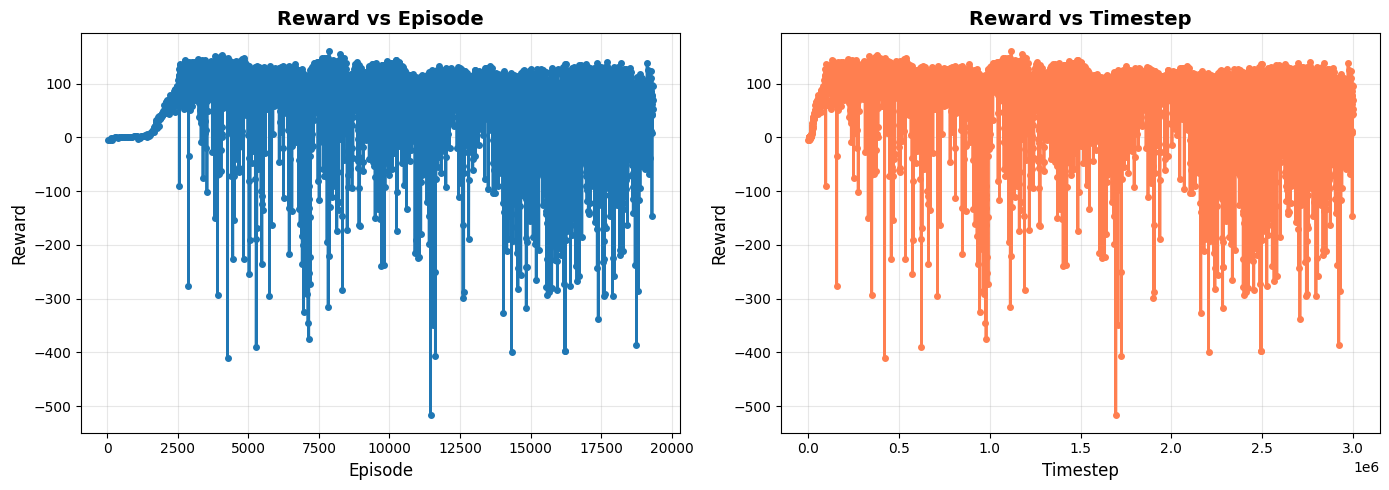

Average Reward: 68.9076
Max Reward: 159.8647
Min Reward: -515.7948


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('/home/tuan/Desktop/drone_rl_control/log_dir/PPO_log_thrugate_ppo.csv')

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot reward vs episode
ax1.plot(df['episode'], df['reward'], marker='o', linewidth=2, markersize=4)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Reward', fontsize=12)
ax1.set_title('Reward vs Episode', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot reward vs timestep
ax2.plot(df['timestep'], df['reward'], marker='o', linewidth=2, markersize=4, color='coral')
ax2.set_xlabel('Timestep', fontsize=12)
ax2.set_ylabel('Reward', fontsize=12)
ax2.set_title('Reward vs Timestep', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reward_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"Average Reward: {df['reward'].mean():.4f}")
print(f"Max Reward: {df['reward'].max():.4f}")
print(f"Min Reward: {df['reward'].min():.4f}")

In [1]:
import pybullet as p
import time
import pybullet_data
import numpy as np

def euler_from_quaternion(x: float, y: float, z: float, w: float):
    """
    Convert quaternion (x, y, z, w) to Euler angles (roll, pitch, yaw) in radians.
    Convention: intrinsic rotations Z (yaw) -> Y (pitch) -> X (roll) (ZYX).
    """
    # roll (x-axis rotation)
    sinr_cosp = 2.0 * (w * x + y * z)
    cosr_cosp = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(sinr_cosp, cosr_cosp)

    # pitch (y-axis rotation)
    sinp = 2.0 * (w * y - z * x)
    sinp = np.clip(sinp, -1.0, 1.0)
    pitch = np.arcsin(sinp)

    # yaw (z-axis rotation)
    siny_cosp = 2.0 * (w * z + x * y)
    cosy_cosp = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(siny_cosp, cosy_cosp)

    return roll, pitch, yaw

def gate_normal_world(quat_xyzw, normal_local=np.array([0., 1., 0.])):
    # R: 3x3 rotation matrix (local -> world)
    R = np.array(p.getMatrixFromQuaternion(quat_xyzw)).reshape(3, 3)
    n_world = R @ normal_local
    n_world = n_world / (np.linalg.norm(n_world) + 1e-12)
    return n_world

physicsClient = p.connect(p.GUI)#or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally
p.setGravity(0,0,-10)
# planeId = p.loadURDF("/home/tuan/Desktop/drone_rl_control/gym_pybullet_drones/assets/gate.urdf")
startPos = [0, -1, 0.3]
startOrientation = p.getQuaternionFromEuler([0,0,1.57])
boxId = p.loadURDF("/home/tuan/Desktop/drone_rl_control/gym_pybullet_drones/assets/gate.urdf",startPos, startOrientation)
#set the center of mass frame (loadURDF sets base link frame)
# startPos/Ornp.resetBasePositionAndOrientation(boxId, startPos,
# # startOrientation)
for i in range (10000):
    p.stepSimulation()
    time.sleep(1./240.)
    cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
    cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)

    # thử 2 giả thuyết để xem cái nào đúng với URDF của gate bạn
    nY = gate_normal_world(cubeOrn, np.array([0., 1., 0.]))
    nX = gate_normal_world(cubeOrn, np.array([1., 0., 0.]))

    print("normal if local Y is normal:", nY)
    print("normal if local X is normal:", nX)
    roll, pithch, yaw = euler_from_quaternion(cubeOrn[0], cubeOrn[1], cubeOrn[2], cubeOrn[3])
    print(cubePos,yaw)
p.disconnect()

pybullet build time: Sep 29 2025 13:26:22


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 5060/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 580.95.05
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 580.95.05
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 5060/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
normal if local Y is normal: [-9.99999683e-01  7.96326711e-04  0.00000000e+00]
normal if local X is normal: [7.96326711e-04 9.99999683e-01 0.00000000e+0

In [ ]:
import numpy as np
import pybullet as p

def gate_normal_world(quat_xyzw, normal_local=np.array([0., 1., 0.])):
    # R: 3x3 rotation matrix (local -> world)
    R = np.array(p.getMatrixFromQuaternion(quat_xyzw)).reshape(3, 3)
    n_world = R @ normal_local 
    n_world = n_world / (np.linalg.norm(n_world) + 1e-12)
    return n_world

R = np.array(p.getMatrixFromQuaternion(cubeOrn)).reshape(3,3)
x_axis_world = R[:,0]  # local X trong world
y_axis_world = R[:,1]  # local Y trong world
z_axis_world = R[:,2]  # local Z trong world

print("X_world", x_axis_world, "Y_world", y_axis_world, "Z_world", z_axis_world)

array([0.0707372 , 0.99749499, 0.        ])

In [2]:
import numpy as np
import pybullet as p

gate_pos = np.array([0, -1, 0])
gate_quat = p.getQuaternionFromEuler([0, 0, 1.5])

R = np.array(p.getMatrixFromQuaternion(gate_quat)).reshape(3,3)

# Chọn 1 trục local nghi là normal (thử [0,1,0] trước nếu bạn dùng local[1] là depth)
axis_local = np.array([0, 1, 0])     # hoặc np.array([1,0,0])

n = R @ axis_local
n = n / np.linalg.norm(n)
n


array([-0.99749499,  0.0707372 ,  0.        ])

In [ ]:
n